In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from model.db import DB_ENGINE
from datetime import datetime
import numpy as np

In [18]:
df = pd.read_sql(
    'SELECT p.pid, p.clickcount, p.replycount, r.upCount, r.shang, r.totalScore, r.posttime FROM posts p, replys r WHERE p.pid=r.pid AND r.replyid=0',
    con=DB_ENGINE, 
    index_col='pid', 
    parse_dates=['posttime']
)
df

,clickcount,replycount,upCount,shang,totalScore,posttime
pid,,,,,,
1,134,6,0,0.0,0.00,2018-07-15 00:47:55
2,83,6,0,0.0,0.00,2018-07-15 06:38:52
3,499,4,1,0.0,50.72,2018-07-15 15:10:31
4,11535,5,0,0.0,0.00,2018-07-16 09:03:09
5,89,1,0,0.0,0.00,2018-07-16 10:08:26
6,18,1,0,0.0,0.00,2018-07-16 10:09:49
7,11,1,0,0.0,0.00,2018-07-16 10:16:20
8,24,1,0,0.0,0.00,2018-07-16 10:30:34
9,29,2,0,0.0,0.00,2018-07-16 10:35:17


In [21]:
print(df.dtypes)
df.describe()

clickcount             int64
replycount             int64
upCount                int64
shang                float64
totalScore           float64
posttime      datetime64[ns]
dtype: object


,clickcount,replycount,upCount,shang,totalScore
count,7.371700e+04,73717.000000,73717.000000,73717.000000,73717.000000
mean,2.879154e+03,78.066728,13.564022,5.830161,219.113911
std,2.900466e+04,814.192578,77.269020,396.532467,989.998688
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,6.000000e+01,1.000000,0.000000,0.000000,0.000000
50%,2.090000e+02,7.000000,2.000000,0.000000,50.060000
75%,9.750000e+02,31.000000,8.000000,0.000000,161.660000
max,3.503429e+06,125474.000000,2778.000000,93694.000000,53898.840000


In [40]:
A8 = datetime(2018, 8, 8, 0, 0, 0)
A15 = datetime(2018, 8, 15, 0, 0, 0)

In [79]:
df['afterA8'] = df['posttime'].apply(lambda x: x>A8)
df['afterA15'] = df['posttime'].apply(lambda x: x>A15)
df['days'] = df['posttime'].apply(lambda x: (x-datetime(2018,7,15)).days)
df.head()

,clickcount,replycount,upCount,shang,totalScore,posttime,afterA8,afterA15,days
pid,,,,,,,,,
1,134,6,0,0.0,0.00,2018-07-15 00:47:55,False,False,0
2,83,6,0,0.0,0.00,2018-07-15 06:38:52,False,False,0
3,499,4,1,0.0,50.72,2018-07-15 15:10:31,False,False,0
4,11535,5,0,0.0,0.00,2018-07-16 09:03:09,False,False,1
5,89,1,0,0.0,0.00,2018-07-16 10:08:26,False,False,1


In [45]:
from sklearn.linear_model import LinearRegression

In [80]:
X = np.asanyarray(df[['days']])
y = np.asanyarray(df[['upCount', 'shang', 'totalScore']])
model = LinearRegression(n_jobs=2).fit(X, y)

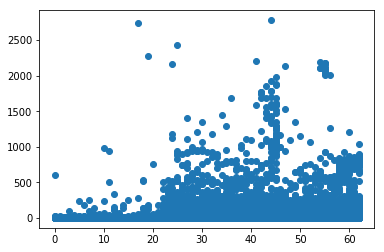

In [85]:
plt.scatter(df['days'], df[['upCount']])

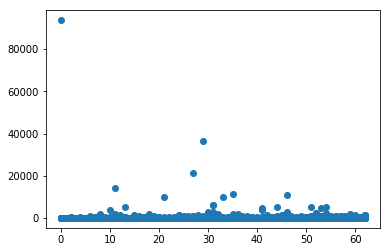

In [87]:
plt.scatter(df['days'], df[['shang']])

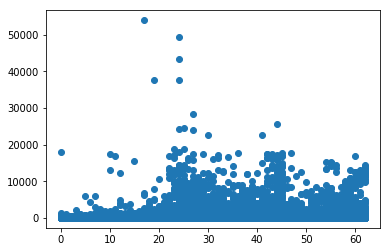

In [88]:
plt.scatter(df['days'], df[['totalScore']])

In [89]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [97]:
X = np.asanyarray(df[['days']])
y = np.asanyarray(df[['upCount']])

In [100]:
result = sm.OLS(X, y).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     2598.
Date:                Wed, 12 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:43:15   Log-Likelihood:            -3.7597e+05
No. Observations:               73717   AIC:                         7.519e+05
Df Residuals:                   73716   BIC:                         7.520e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0950      0.002     50.967      0.000       0.091       0.099
==============================================================================
Omnibus:                    19451.592   Durbin-Watson:                   0.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           131055.721
Skew:                          -1.100   Prob(JB):                         0.00
Kurtosis:                       9.150   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""